In [1]:
import os
import time, datetime
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import sklearn.metrics 

import matplotlib as mpl
mpl.use('TkAgg')


import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from sklearn.externals import joblib 




In [2]:
def rand_datasets(df, train_pct):
    rand_num = np.random.rand(len(df))
    
    df_train = df[rand_num < train_pct]
    df_cross = df[rand_num >= train_pct]
    
    return df_train, df_cross

#Geting data and change data type
data_dir = '/Users/derekwang/Work/Stock_out/Data/STOCK_OUT_master_training.csv'

data_raw = pd.read_csv(data_dir, sep=',', header=0)
#data_raw['TRUCK_CONSTRAINT'] = data_raw.TRUCK_CONSTRAINT.astype('int64')


In [3]:
data_clean = data_raw # outlier_remove(data_raw)
data_clean.head()

,LOC_ID,ITEM_ID,CAL_DT,STR_INV_STR_VOL_LVL_CD,STR_INV_STRD_VOL_LVL_CD,STR_INV_STRC_VOL_LVL_CD,STR_INV_STRSC_VOL_LVL_CD,ITEM_VLCTY_CD,OH_QTY,OO_QTY,...,REV_TM_DAYS_CNT,SFTY_STK_QTY,SVC_LVL_VAL,ASL_OSL_VAL,ADJ_ASW_QTY,CAR_PARM_CURR_RETL_AMT,WK1_FCST,WK2_FCST,WK3_FCST,SIMPL_OOS_IND
0,2682,6040770,2018-01-21,2,1,1,2,2,0.0,15,...,7,18.351539,99.70,77.08,4.490,13.27,5.155,3.969,3.513,1
1,359,5983727,2018-01-21,2,1,2,2,3,11.0,0,...,7,12.731372,95.00,98.77,2.890,1.98,5.066,5.114,5.018,1
2,1262,719971,2018-01-21,2,1,2,2,1,13.0,90,...,4,53.837502,88.68,97.72,44.697,3.48,53.784,52.318,50.330,1
3,1366,2601810,2018-01-21,2,1,1,2,2,40.0,0,...,7,25.809154,99.30,99.90,12.470,0.96,12.796,12.548,11.958,0
4,755,5218758,2018-01-21,1,1,1,1,1,121.0,30,...,7,63.625968,99.80,100.00,25.311,19.98,29.909,29.334,28.183,0


In [4]:
df_train, df_cross = rand_datasets(data_clean, 0.80)

In [5]:
train_features = df_train.iloc[:,3:-1]
X = train_features.values
train_labels = df_train['SIMPL_OOS_IND']
y = train_labels.values



test_features = df_cross.iloc[:,3:-1]
X_test = test_features.values
test_labels = df_cross['SIMPL_OOS_IND']
y_test = test_labels.values


scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

In [6]:
summary = []

#Start training
start_time = datetime.datetime.now().strftime('%H:%M:%S')
print("start time is %s" %start_time)

clf_dnn = MLPClassifier(alpha = .00001, hidden_layer_sizes = (64, 128, 64, 32, 16, 8), max_iter = 10000)


clf_dnn.fit(X_train_scaled,y)

end_time = datetime.datetime.now().strftime('%H:%M:%S')
print("end time is %s" % end_time)

joblib.dump(clf_dnn, 'clf.pkl')


train_score = clf_dnn.score(X_train_scaled,y)
print('train score is %s' % train_score)


y_pred = clf_dnn.predict(X_train_scaled)

#y_pred_df = pd.DataFrame(y_pred)
#y_pred_df.to_csv('C:\\Users\\MXW6827\\Documents\\Work\\Truck Load Overage\\Models\\test\\Cross_val_prediction_1009.csv')


f1_score = sklearn.metrics.f1_score(y, y_pred)
print("F1 score on self is %s" % f1_score)
recall_score = sklearn.metrics.recall_score(y, y_pred)
print("Recall score on self is %s" % recall_score)
precision_score = sklearn.metrics.precision_score(y, y_pred)
print("Precision score on self is %s" % precision_score)

test_score = clf_dnn.score(X_test_scaled,y_test)
print ('test score is %s' % test_score)
y_t_pred = clf_dnn.predict(X_test_scaled)

t_f1_score = sklearn.metrics.f1_score(y_test, y_t_pred)
print("F1 score on holdout is %s" % t_f1_score)
t_recall_score = sklearn.metrics.recall_score(y_test, y_t_pred)
print("Recall score on holdout is %s" % t_recall_score)
t_precision_score = sklearn.metrics.precision_score(y_test, y_t_pred)
print("Precision score on holdout is %s" % t_precision_score)

#     summary .append([i * 10, train_score, f1_score, recall_score, precision_score, test_score, t_f1_score, t_recall_score, t_precision_score])

start time is 11:06:20
end time is 12:15:30
train score is 0.834531352030293
F1 score on self is 0.280739955710727
Recall score on self is 0.1759685984202441
Precision score on self is 0.6938670058428396
test score is 0.8325415098157072
F1 score on holdout is 0.27441369380899056
Recall score on holdout is 0.17207977207977207
Precision score on holdout is 0.6770445216293022


In [7]:
y_pred_prob =clf_dnn.predict_proba(X_test_scaled)
y_pred_prob

array([[0.16466347, 0.83533653],
       [0.49339059, 0.50660941],
       [0.91721569, 0.08278431],
       ...,
       [0.36779048, 0.63220952],
       [0.97014731, 0.02985269],
       [0.90632155, 0.09367845]])

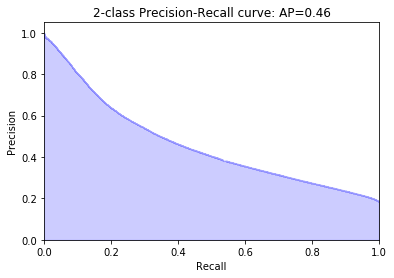

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_prob[:,1])
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [9]:
final_result = pd.DataFrame(data = summary, columns = ['Epochs','Train Score','Train F1','Train Recall', 'Train Precision', 'Test Score', 'Test F1', 'Test Recall', 'Test Precision'])
final_result

,Epochs,Train Score,Train F1,Train Recall,Train Precision,Test Score,Test F1,Test Recall,Test Precision


In [10]:
data_dir = '/Users/derekwang/Work/Stock_out/Data/STOCK_OUT_master_training_0219.csv'

data_raw = pd.read_csv(data_dir, sep=',', header=0)
final_test_features = data_raw.iloc[:,3:-1]
X_final_test = final_test_features.values
train_labels = data_raw['SIMPL_OOS_IND']
y_final_test = train_labels.values
X_final_test_scaled = scaler.transform(X_final_test)

In [11]:
y_final_pred_prob =clf_dnn.predict_proba(X_final_test_scaled)
y_final_pred_prob

array([[0.87830672, 0.12169328],
       [0.96703122, 0.03296878],
       [0.93044543, 0.06955457],
       ...,
       [0.93866073, 0.06133927],
       [0.88978025, 0.11021975],
       [0.92643052, 0.07356948]])

In [3]:
average_precision = average_precision_score(y_final_test, y_final_pred_prob[:,1])
precision, recall, thresholds = precision_recall_curve(y_final_test, y_final_pred_prob[:,1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

NameError: name 'average_precision_score' is not defined

In [2]:
precision

'%r'